In[1]:

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from keras.utils import np_utils
import keras
get_ipython().magic('matplotlib inline')

Importing data from csv files:<br>
1. train.csv : The training data set, has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.<br>
2. test.csv: The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.<br>
<br>
Reading train data using pandas.<br>
<br>


In[2]:

In [46]:
data = pd.read_csv("../input/train.csv")
data = data.values
#Taking labels(first column) out of data.
label = data[:,0]

Drop 'label' column

In [47]:
data = data[:,1:]

In [48]:
print("Data loaded, ready to go!")

Data loaded, ready to go!


In[3]:

lot distribution of label values

C:\Users\basit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


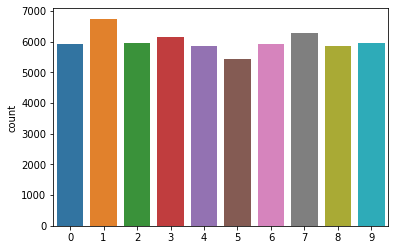

In [49]:
g = sns.countplot(label)

Diving data and label into two parts: train and validation.<br>
We have a separate test.csv file for testing our model predictions

In[4]:

plitting data into train and valid

In [50]:
train_data=data[:35000,:]
valid_data=data[35000:,:]

eshaping to make it in proper input shape for a neural network

In [79]:
train_data = train_data.reshape(-1,28 , 28, 1).astype('float32')
valid_data = valid_data.reshape(-1, 28, 28,1).astype('float32')

ormalise data

In [80]:
train_data = train_data / 255
valid_data= valid_data/255

pliting label into train and valid

In [81]:
train_label = label[:35000]
valid_label = label[35000:]

ne-hot-encoding<br>
ncode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])

In [82]:
train_label = np_utils.to_categorical(train_label)
valid_label = np_utils.to_categorical(valid_label)
print((label[0]))

5


rint shape

In [83]:
print("train_data shape: ",train_data.shape)
print("train_label shape: ",train_label.shape)
print("valid_data shape: ",valid_data.shape)
print("valid_label shape: ",valid_label.shape)

train_data shape:  (35000, 28, 28, 1)
train_label shape:  (35000, 10)
valid_data shape:  (25000, 28, 28, 1)
valid_label shape:  (25000, 10)


Importing modules needed to build model<br>
Keras does provide a lot of capability for creating convolutional neural networks.

In[5]:

In [84]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
keras.backend.image_data_format()
#K.set_image_dim_ordering('th')

'channels_last'

fix random seed for reproducibility

In [85]:
seed = 7
np.random.seed(seed)

Define a function to create a model

In[6]:

In [86]:
def create_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [87]:
model = create_model()

Passing training and validation data along with labels to model

In[7]:

build the model

In [89]:

# Fit the model
model.fit(train_data, train_label, validation_data=(valid_data, valid_label), epochs=5, batch_size=200, verbose=2)

Epoch 1/5
175/175 - 12s - loss: 0.3894 - accuracy: 0.8856 - val_loss: 0.3547 - val_accuracy: 0.8933
Epoch 2/5
175/175 - 12s - loss: 0.3654 - accuracy: 0.8912 - val_loss: 0.3316 - val_accuracy: 0.9027
Epoch 3/5
175/175 - 12s - loss: 0.3450 - accuracy: 0.8971 - val_loss: 0.3157 - val_accuracy: 0.9064
Epoch 4/5
175/175 - 12s - loss: 0.3260 - accuracy: 0.9037 - val_loss: 0.3013 - val_accuracy: 0.9105
Epoch 5/5
175/175 - 12s - loss: 0.3104 - accuracy: 0.9073 - val_loss: 0.2864 - val_accuracy: 0.9155


In[8]:

Final evaluation of the model

In [90]:
scores = model.evaluate(valid_data, valid_label, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 8.45%


Exciting! we have trained our model<br>
Saving model weights for later use

In[9]:

In [91]:
model.save("model.h5")
print("model weights saved in model.h5 file")

model weights saved in model.h5 file


Saving model information in .json file

In[10]:

In [92]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print("model saved as model.json file")

model saved as model.json file
